In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [2]:
df = pd.read_csv(r'C:\Users\garvd\Downloads\netflix1.csv')

In [3]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [5]:
df.shape

(8790, 10)

In [6]:
df.dropna(inplace = True)
df.isna().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

# Content distribution on Netflix.

In [7]:
showtype = df['type'].value_counts().reset_index()

In [8]:
showtype

,type,count
0,Movie,6126
1,TV Show,2664


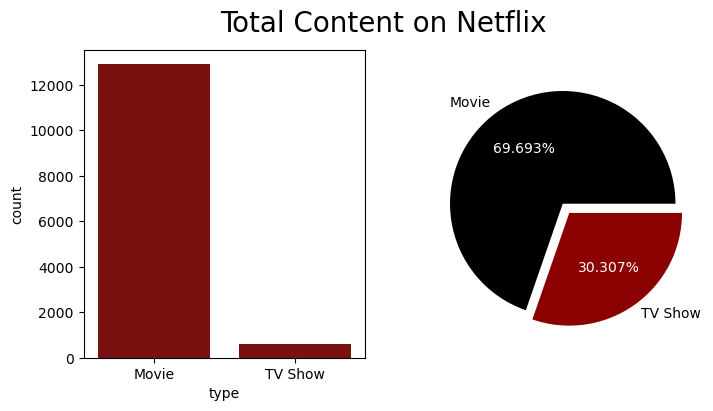

In [38]:
freq=df['type'].value_counts()
fig, axes=plt.subplots(1,2, figsize=(8, 4))
sns.countplot(df, x=df['type'], ax=axes[0], color='darkred')
patches, texts, autotexts = plt.pie(showtype['count'], labels=['Movie', 'TV Show'], colors=['black', 'darkred'], autopct='%1.3f%%', explode=[0,0.1])
plt.suptitle('Total Content on Netflix', fontsize=20)
for autotext in autotexts:
    autotext.set_color('white')

# Visual representation of rating frequency of movies and TV Shows on Netflix

In [10]:
df['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

Text(0.5, 0.98, 'Rating on Netflix')

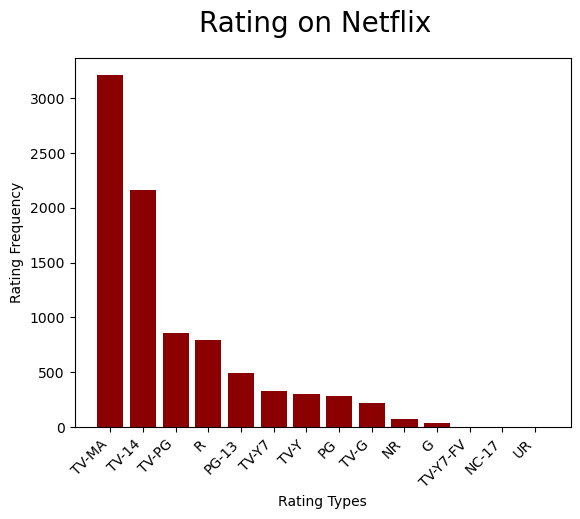

In [11]:
ratings=df['rating'].value_counts().reset_index().sort_values(by='count', ascending=False)

plt.bar(ratings['rating'], ratings['count'], color='darkred')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Rating Types")
plt.ylabel("Rating Frequency")
plt.suptitle('Rating on Netflix', fontsize=20)

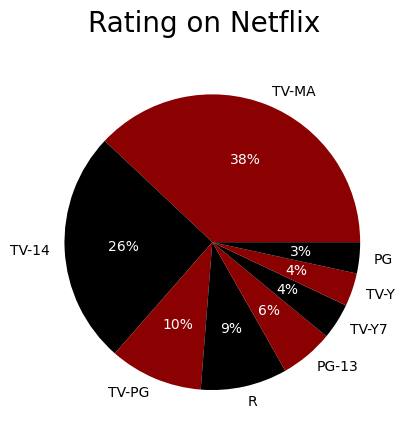

In [39]:
patches, texts, autotexts = plt.pie(ratings['count'][:8], labels=ratings['rating'][:8], autopct='%.0f%%', colors=['darkred', 'black'])
plt.suptitle('Rating on Netflix', fontsize=20)
for autotext in autotexts:
    autotext.set_color('white')

# Converting date_added column to datetime

In [13]:
df['date_added']=pd.to_datetime(df['date_added'], format='mixed')

In [14]:
df.describe()

,date_added,release_year
count,8790,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-03 00:00:00,2017.000000
75%,2020-08-19 18:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.825466


In [15]:
df['date_added'] = df['date_added'].dt.month
df['date_added'].dtypes

dtype('int32')

In [16]:
df['country'].value_counts()

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: count, Length: 86, dtype: int64

# Top 10 countries with most content on Netflix

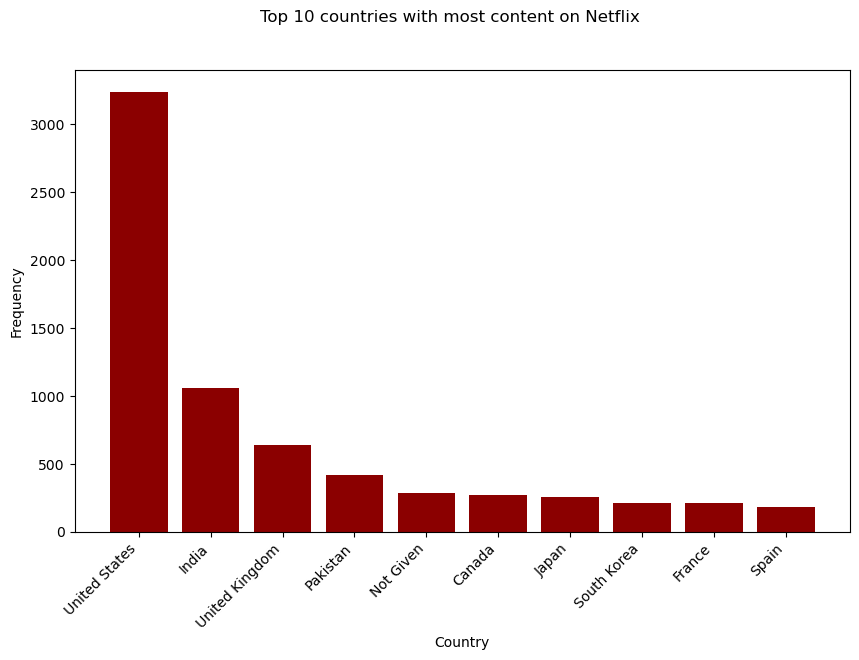

In [17]:
top_ten_countries=df['country'].value_counts().reset_index().sort_values(by='count', ascending=False)[:10]
plt.figure(figsize=(10, 6))
plt.bar(top_ten_countries['country'], top_ten_countries['count'], color='darkred')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.suptitle("Top 10 countries with most content on Netflix")
plt.show()

# Monthly releases of Movies and TV shows on Netflix

In [18]:
df.rename(columns={'date_added': 'month'}, inplace = True)

In [19]:
df

,show_id,type,title,director,country,month,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6,2016,TV-Y,1 Season,Kids' TV


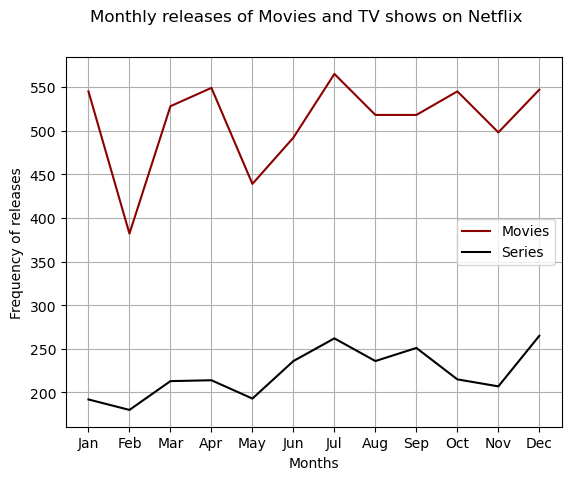

In [20]:
monthly_movie_release=df[df['type']=='Movie']['month'].value_counts().sort_index()
monthly_series_release=df[df['type']=='TV Show']['month'].value_counts().sort_index()
plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies', color='darkred')
plt.plot(monthly_series_release.index, monthly_series_release.values, label='Series', color='black')
plt.xlabel("Months")
plt.ylabel("Frequency of releases")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.suptitle('Monthly releases of Movies and TV shows on Netflix')
plt.show()

# Yearly releases of Movies and TV Shows on Netflix

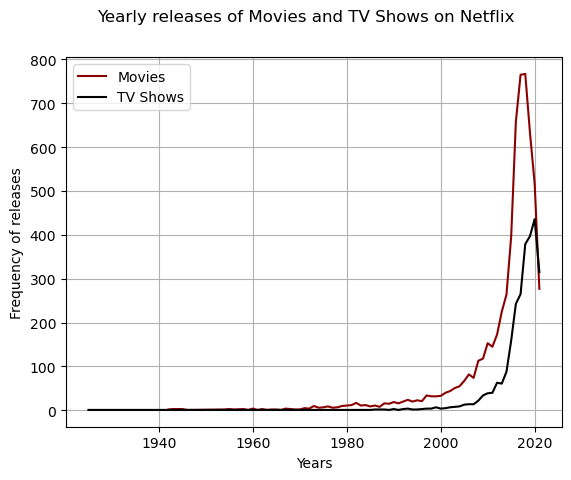

In [21]:
yearly_movie_releases=df[df['type']=='Movie']['release_year'].value_counts().sort_index()
yearly_series_releases=df[df['type']=='TV Show']['release_year'].value_counts().sort_index()
plt.plot(yearly_movie_releases.index, yearly_movie_releases.values, label='Movies', color='darkred')
plt.plot(yearly_series_releases.index, yearly_series_releases.values, label='TV Shows', color='black')
plt.xlabel("Years")
plt.ylabel("Frequency of releases")
plt.grid(True)
plt.suptitle("Yearly releases of Movies and TV Shows on Netflix")
plt.legend()

# Top 10 popular movie genres

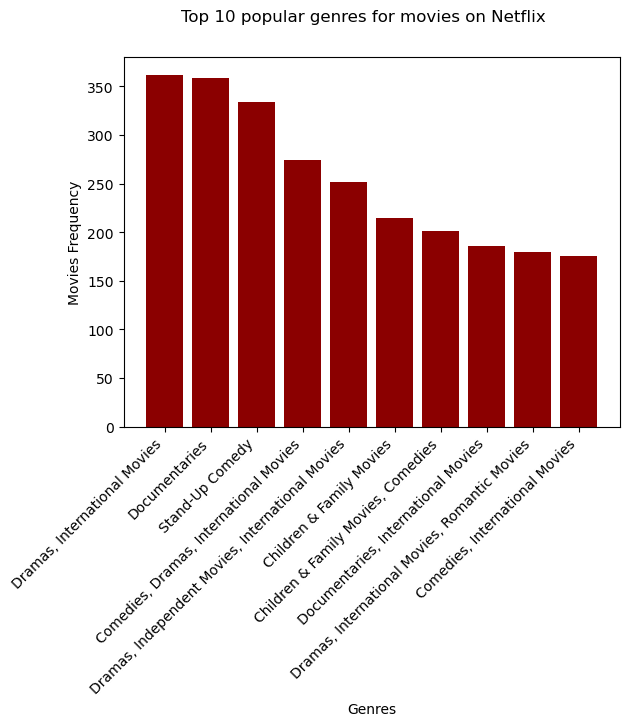

In [22]:
popular_movie_genre=df[df['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]
popular_series_genre=df[df['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10]

plt.bar(popular_movie_genre.index, popular_movie_genre.values, color='darkred')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Movies Frequency")
plt.suptitle("Top 10 popular genres for movies on Netflix")
plt.show()

# Top 10 TV Shows genres

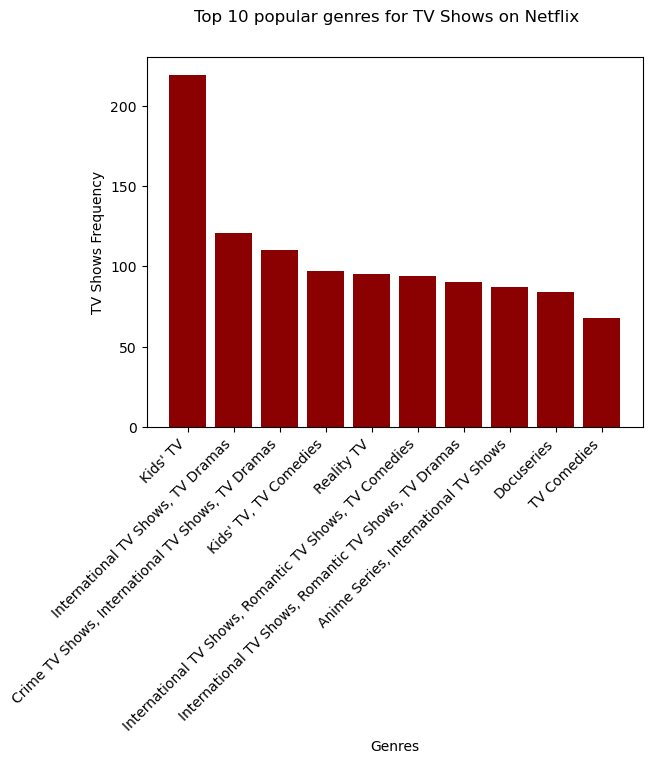

In [23]:
plt.bar(popular_series_genre.index, popular_series_genre.values, color='darkred')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("TV Shows Frequency")
plt.suptitle("Top 10 popular genres for TV Shows on Netflix")
plt.show()

# We'd split genres into a list and then EXPLODE our Dataframe to have only one genre per row for each movie

In [24]:
df['listed_in'] = df['listed_in'].str.split(', ')

df = df.explode('listed_in').reset_index(drop=True)

df.head()

,show_id,type,title,director,country,month,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9,2021,TV-MA,1 Season,Crime TV Shows
2,s3,TV Show,Ganglands,Julien Leclercq,France,9,2021,TV-MA,1 Season,International TV Shows
3,s3,TV Show,Ganglands,Julien Leclercq,France,9,2021,TV-MA,1 Season,TV Action & Adventure
4,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9,2021,TV-MA,1 Season,TV Dramas


In [25]:
df.shape
df

,show_id,type,title,director,country,month,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9,2021,TV-MA,1 Season,Crime TV Shows
2,s3,TV Show,Ganglands,Julien Leclercq,France,9,2021,TV-MA,1 Season,International TV Shows
3,s3,TV Show,Ganglands,Julien Leclercq,France,9,2021,TV-MA,1 Season,TV Action & Adventure
4,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9,2021,TV-MA,1 Season,TV Dramas
...,...,...,...,...,...,...,...,...,...,...
19289,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12,2012,TV-PG,1 Season,International TV Shows
19290,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12,2012,TV-PG,1 Season,Romantic TV Shows
19291,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12,2012,TV-PG,1 Season,TV Dramas
19292,s8784,TV Show,Yoko,Not Given,Pakistan,6,2016,TV-Y,1 Season,Kids' TV


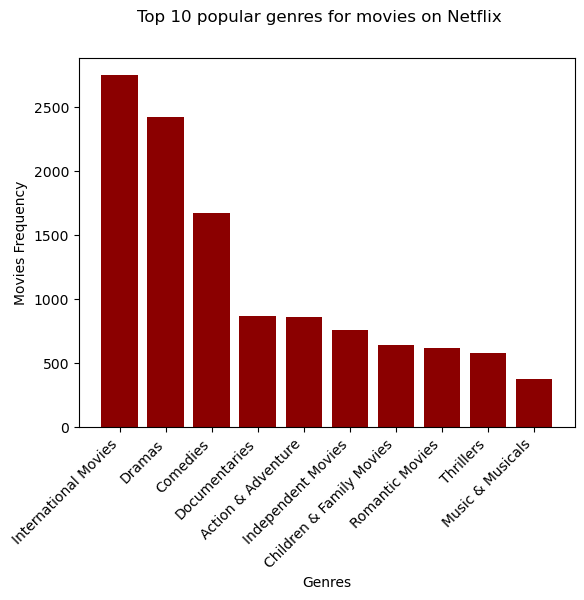

In [26]:
popular_movie_genre=df[df['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]
popular_series_genre=df[df['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10]

plt.bar(popular_movie_genre.index, popular_movie_genre.values, color='darkred')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Movies Frequency")
plt.suptitle("Top 10 popular genres for movies on Netflix")
plt.show()

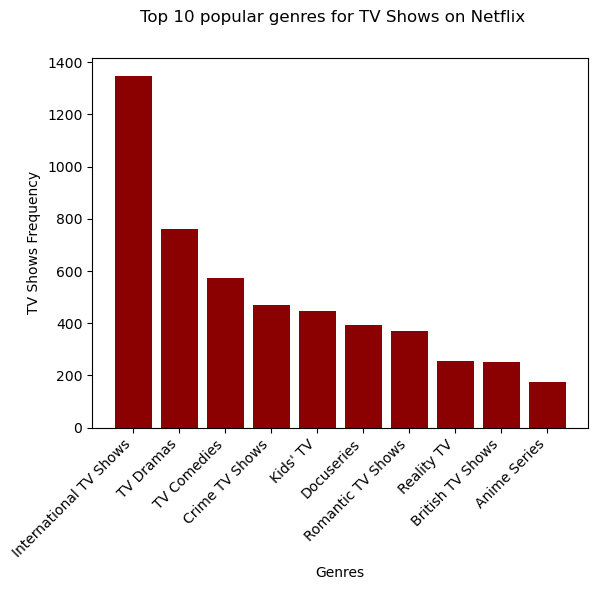

In [27]:
plt.bar(popular_series_genre.index, popular_series_genre.values, color='darkred')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("TV Shows Frequency")
plt.suptitle("Top 10 popular genres for TV Shows on Netflix")
plt.show()

# Top 15 directors across Netflix with high frequency of movies and shows

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Alastair Fothergill'),
  Text(1, 0, 'Cathy Garcia-Molina'),
  Text(2, 0, 'Youssef Chahine'),
  Text(3, 0, 'Suhas Kadav'),
  Text(4, 0, 'David Dhawan'),
  Text(5, 0, 'Martin Scorsese'),
  Text(6, 0, 'Steven Spielberg'),
  Text(7, 0, 'Mae Czarina Cruz'),
  Text(8, 0, 'Hakan Algül'),
  Text(9, 0, 'Rajiv Chilaka'),
  Text(10, 0, 'Hidenori Inoue'),
  Text(11, 0, 'Toshiya Shinohara'),
  Text(12, 0, 'S.S. Rajamouli'),
  Text(13, 0, 'Kunle Afolayan')])

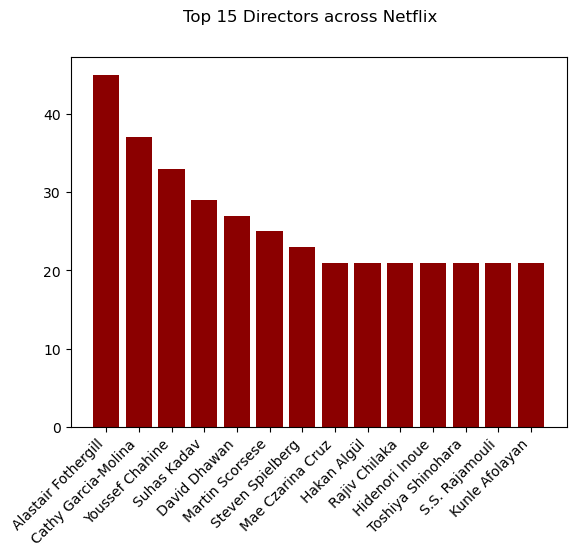

In [28]:
directors=df['director'].value_counts().reset_index().sort_values(by='count', ascending=False)[1:15]
plt.bar(directors['director'], directors['count'], color='darkred')
plt.suptitle("Top 15 Directors across Netflix")
plt.xticks(rotation=45, ha='right')


# Word Cloud of Movie Titles

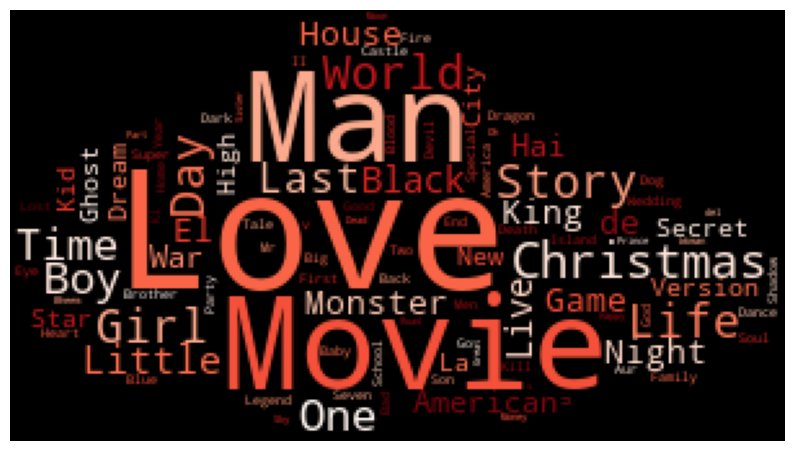

In [29]:
movie_titles = df[df['type'] == 'Movie']['title']
mask = np.array(Image.open('cloud.jpg'))
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Reds_r', collocations=False, stopwords = STOPWORDS, mask=mask).generate(' '.join(movie_titles))

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Word Cloud of TV Show Titles

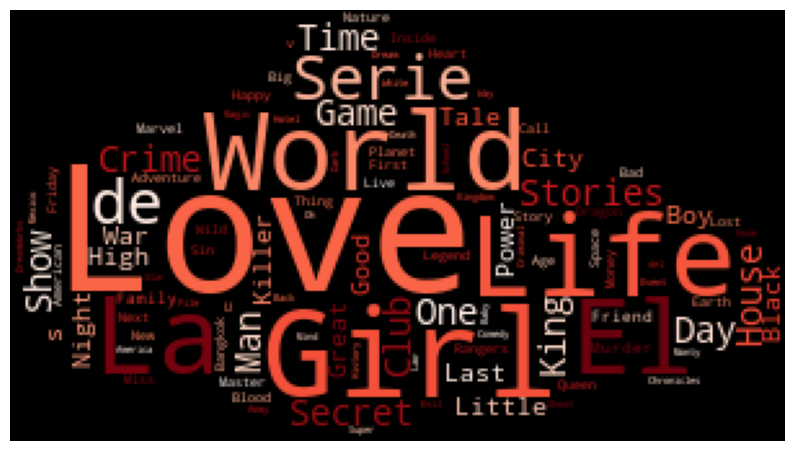

In [30]:
TV_Show_titles = df[df['type'] == 'TV Show']['title']
mask = np.array(Image.open('cloud.jpg'))
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Reds_r', collocations=False, stopwords = STOPWORDS, mask=mask).generate(' '.join(TV_Show_titles))

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# To plot a wordcloud for Top Directors of Movies and TV Shows on Netflix we need to first make sure that we deal with the "Not Given" values of director column and also make sure that the values in column director is in suitable format for a wordcloud plotting

In [31]:
df['director'].dtypes

dtype('O')

In [32]:
df

,show_id,type,title,director,country,month,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9,2021,TV-MA,1 Season,Crime TV Shows
2,s3,TV Show,Ganglands,Julien Leclercq,France,9,2021,TV-MA,1 Season,International TV Shows
3,s3,TV Show,Ganglands,Julien Leclercq,France,9,2021,TV-MA,1 Season,TV Action & Adventure
4,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9,2021,TV-MA,1 Season,TV Dramas
...,...,...,...,...,...,...,...,...,...,...
19289,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12,2012,TV-PG,1 Season,International TV Shows
19290,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12,2012,TV-PG,1 Season,Romantic TV Shows
19291,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12,2012,TV-PG,1 Season,TV Dramas
19292,s8784,TV Show,Yoko,Not Given,Pakistan,6,2016,TV-Y,1 Season,Kids' TV


In [33]:
df = df[df['director'] != 'Not Given']
print(df)

      show_id     type                              title  \
0          s1    Movie               Dick Johnson Is Dead   
1          s3  TV Show                          Ganglands   
2          s3  TV Show                          Ganglands   
3          s3  TV Show                          Ganglands   
4          s6  TV Show                      Midnight Mass   
...       ...      ...                                ...   
14251   s3351    Movie         True: Grabbleapple Harvest   
14252   s3509    Movie             True: Tricky Treat Day   
14253   s3554  TV Show       True and the Rainbow Kingdom   
14254   s4241    Movie  Sam Kinison: The Scream Continues   
14255   s1315  TV Show                   Chappelle's Show   

                           director        country  month  release_year  \
0                   Kirsten Johnson  United States      9          2020   
1                   Julien Leclercq         France      9          2021   
2                   Julien Leclercq       

In [34]:
df['director'].astype(str)

0                     Kirsten Johnson
1                     Julien Leclercq
2                     Julien Leclercq
3                     Julien Leclercq
4                       Mike Flanagan
                     ...             
14251    Mark Thornton, Todd Kauffman
14252    Mark Thornton, Todd Kauffman
14253    Mark Thornton, Todd Kauffman
14254                Walter C. Miller
14255                     Stan Lathan
Name: director, Length: 13490, dtype: object

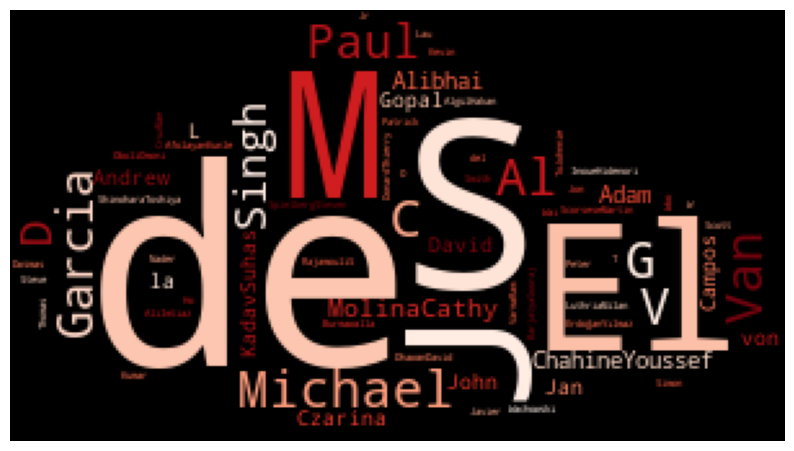

In [35]:
Top_Directors = df[df['type'] == 'Movie']['director']
mask = np.array(Image.open('cloud.jpg'))
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Reds_r', collocations=False, mask=mask).generate(''.join(Top_Directors))

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

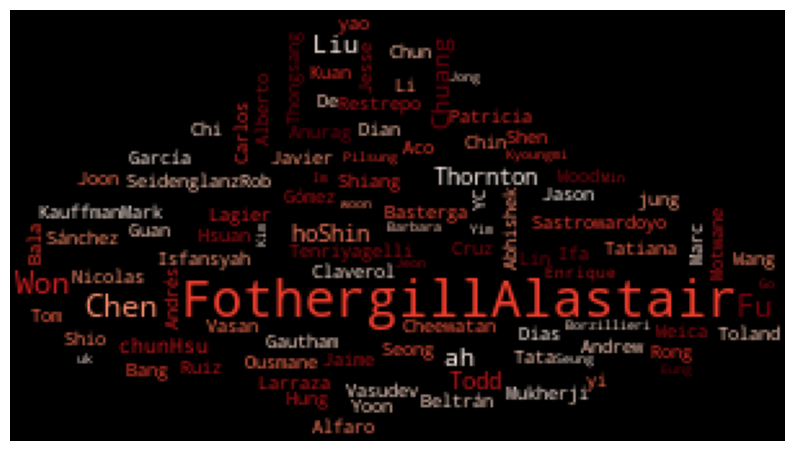

In [36]:
Top_Directors = df[df['type'] == 'TV Show']['director']
mask = np.array(Image.open('cloud.jpg'))
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, min_font_size=5, background_color='black', colormap='Reds_r', collocations=False, mask=mask).generate(''.join(Top_Directors))

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()